# **Import libraries**

In [ ]:
#Import important libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

# **Load dataset**

In [ ]:
#Read the dataset

df = pd.read_csv('03-02-2018.csv')

In [ ]:
#Display the dataset

df

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,443,6,02/03/2018 08:47:38,141385,9,7,553,3773.0,202,0,61.444444,87.534438,1460,0,539.000000,655.432936,30597.305230,113.166177,9425.666667,19069.116850,73403.0,1.0,141385.0,17673.1250,23965.32327,73403.0,22.0,51417.0,8569.50000,13036.89082,31525.0,1.0,0,0,0,0,192,152,63.655975,49.510203,0,1460,254.470588,474.712955,225352.389700,0,0,1,1,0,0,0,1,0,270.375000,61.444444,539.000000,0,0,0,0,0,0,9,553,7,3773,8192,119,4,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,49684,6,02/03/2018 08:47:38,281,2,1,38,0.0,38,0,19.000000,26.870058,0,0,0.000000,0.000000,135231.316700,10676.156580,140.500000,174.655375,264.0,17.0,281.0,281.0000,0.00000,281.0,281.0,0.0,0.00000,0.00000,0.0,0.0,1,0,0,0,40,20,7117.437722,3558.718861,0,38,19.000000,21.939310,481.333333,0,1,0,0,1,0,0,0,0,25.333333,19.000000,0.000000,0,0,0,0,0,0,2,38,1,0,123,0,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,443,6,02/03/2018 08:47:40,279824,11,15,1086,10527.0,385,0,98.727273,129.392497,1460,0,701.800000,636.314186,41501.086400,92.915547,11192.960000,24379.448340,112589.0,1.0,279728.0,27972.8000,36167.74032,112589.0,94.0,258924.0,18494.57143,36356.50372,133669.0,1.0,0,0,0,0,232,312,39.310424,53.605123,0,1460,430.111111,566.234209,320621.179500,0,0,1,1,0,0,0,1,1,446.653846,98.727273,701.800000,0,0,0,0,0,0,11,1086,15,10527,8192,1047,5,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,443,6,02/03/2018 08:47:40,132,2,0,0,0.0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,15151.515150,132.000000,0.000000,132.0,132.0,132.0,132.0000,0.00000,132.0,132.0,0.0,0.00000,0.00000,0.0,0.0,0,0,0,0,40,0,15151.515150,0.000000,0,0,0.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,2,0,0,0,256,-1,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,443,6,02/03/2018 08:47:41,274016,9,13,1285,6141.0,517,0,142.777778,183.887722,1460,0,472.384615,611.180489,27100.607260,80.287282,13048.380950,26311.627030,114077.0,1.0,273946.0,34243.2500,37996.56546,114077.0,201.0,252994.0,21082.83333,39075.73819,135611.0,1.0,0,0,0,0,192,272,32.844797,47.442485,0,1460,322.869565,497.254764,247262.300400,0,0,1,1,0,0,0,1,1,337.545455,142.777778,472.384615,0,0,0,0,0,0,9,1285,13,6141,8192,1047,5,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,3389,6,02/03/2018 02:08:18,3982183,14,8,1442,1731.0,725,0,103.000000,191.125412,1179,0,216.375000,405.464791,796.799143,5.524608,189627.761900,257112.296400,953396.0,34.0,3982183.0,306321.7692,340816.37320,1221092.0,23468.0,3930879.0,561554.14290,350274.78920,953825.0,131451.0,0,0,0,0,292,172,3.515660,2.008948,0,1179,137.956522,278.879491,77773.770750,0,0,1,1,0,0,0,1,0,144.2

# **Explore data analysis**

In [ ]:
#Display First five rows

df.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,443,6,02/03/2018 08:47:38,141385,9,7,553,3773.0,202,0,61.444444,87.534438,1460,0,539.000000,655.432936,30597.30523,113.166177,9425.666667,19069.116850,73403.0,1.0,141385.0,17673.125,23965.32327,73403.0,22.0,51417.0,8569.50000,13036.89082,31525.0,1.0,0,0,0,0,192,152,63.655975,49.510203,0,1460,254.470588,474.712955,225352.389700,0,0,1,1,0,0,0,1,0,270.375000,61.444444,539.000000,0,0,0,0,0,0,9,553,7,3773,8192,119,4,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,49684,6,02/03/2018 08:47:38,281,2,1,38,0.0,38,0,19.000000,26.870058,0,0,0.000000,0.000000,135231.31670,10676.156580,140.500000,174.655375,264.0,17.0,281.0,281.000,0.00000,281.0,281.0,0.0,0.00000,0.00000,0.0,0.0,1,0,0,0,40,20,7117.437722,3558.718861,0,38,19.000000,21.939310,481.333333,0,1,0,0,1,0,0,0,0,25.333333,19.000000,0.000000,0,0,0,0,0,0,2,38,1,0,123,0,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,443,6,02/03/2018 08:47:40,279824,11,15,1086,10527.0,385,0,98.727273,129.392497,1460,0,701.800000,636.314186,41501.08640,92.915547,11192.960000,24379.448340,112589.0,1.0,279728.0,27972.800,36167.74032,112589.0,94.0,258924.0,18494.57143,36356.50372,133669.0,1.0,0,0,0,0,232,312,39.310424,53.605123,0,1460,430.111111,566.234209,320621.179500,0,0,1,1,0,0,0,1,1,446.653846,98.727273,701.800000,0,0,0,0,0,0,11,1086,15,10527,8192,1047,5,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,443,6,02/03/2018 08:47:40,132,2,0,0,0.0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.00000,15151.515150,132.000000,0.000000,132.0,132.0,132.0,132.000,0.00000,132.0,132.0,0.0,0.00000,0.00000,0.0,0.0,0,0,0,0,40,0,15151.515150,0.000000,0,0,0.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,2,0,0,0,256,-1,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,443,6,02/03/2018 08:47:41,274016,9,13,1285,6141.0,517,0,142.777778,183.887722,1460,0,472.384615,611.180489,27100.60726,80.287282,13048.380950,26311.627030,114077.0,1.0,273946.0,34243.250,37996.56546,114077.0,201.0,252994.0,21082.83333,39075.73819,135611.0,1.0,0,0,0,0,192,272,32.844797,47.442485,0,1460,322.869565,497.254764,247262.300400,0,0,1,1,0,0,0,1,1,337.545455,142.777778,472.384615,0,0,0,0,0,0,9,1285,13,6141,8192,1047,5,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [ ]:
# Get some information about data

df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 80 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1048575 non-null  int64  
 1   Protocol           1048575 non-null  int64  
 2   Timestamp          1048575 non-null  object 
 3   Flow Duration      1048575 non-null  int64  
 4   Tot Fwd Pkts       1048575 non-null  int64  
 5   Tot Bwd Pkts       1048575 non-null  int64  
 6   TotLen Fwd Pkts    1048575 non-null  int64  
 7   TotLen Bwd Pkts    1048575 non-null  float64
 8   Fwd Pkt Len Max    1048575 non-null  int64  
 9   Fwd Pkt Len Min    1048575 non-null  int64  
 10  Fwd Pkt Len Mean   1048575 non-null  float64
 11  Fwd Pkt Len Std    1048575 non-null  float64
 12  Bwd Pkt Len Max    1048575 non-null  int64  
 13  Bwd Pkt Len Min    1048575 non-null  int64  
 14  Bwd Pkt Len Mean   1048575 non-null  float64
 15  Bwd Pkt Len Std    1048575 non-n

In [ ]:
# Show how many rows and columns in the dataset 
df.shape

(1048575, 80)

In [ ]:
#Checking the missing values in the dataset
df.isna().sum()

Dst Port         0
Protocol         0
Timestamp        0
Flow Duration    0
Tot Fwd Pkts     0
                ..
Idle Mean        0
Idle Std         0
Idle Max         0
Idle Min         0
Label            0
Length: 80, dtype: int64

In [ ]:
#Copy dataset in new variable 
df_copy = df.copy()

In [ ]:
df_copy.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,443,6,02/03/2018 08:47:38,141385,9,7,553,3773.0,202,0,61.444444,87.534438,1460,0,539.000000,655.432936,30597.30523,113.166177,9425.666667,19069.116850,73403.0,1.0,141385.0,17673.125,23965.32327,73403.0,22.0,51417.0,8569.50000,13036.89082,31525.0,1.0,0,0,0,0,192,152,63.655975,49.510203,0,1460,254.470588,474.712955,225352.389700,0,0,1,1,0,0,0,1,0,270.375000,61.444444,539.000000,0,0,0,0,0,0,9,553,7,3773,8192,119,4,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,49684,6,02/03/2018 08:47:38,281,2,1,38,0.0,38,0,19.000000,26.870058,0,0,0.000000,0.000000,135231.31670,10676.156580,140.500000,174.655375,264.0,17.0,281.0,281.000,0.00000,281.0,281.0,0.0,0.00000,0.00000,0.0,0.0,1,0,0,0,40,20,7117.437722,3558.718861,0,38,19.000000,21.939310,481.333333,0,1,0,0,1,0,0,0,0,25.333333,19.000000,0.000000,0,0,0,0,0,0,2,38,1,0,123,0,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,443,6,02/03/2018 08:47:40,279824,11,15,1086,10527.0,385,0,98.727273,129.392497,1460,0,701.800000,636.314186,41501.08640,92.915547,11192.960000,24379.448340,112589.0,1.0,279728.0,27972.800,36167.74032,112589.0,94.0,258924.0,18494.57143,36356.50372,133669.0,1.0,0,0,0,0,232,312,39.310424,53.605123,0,1460,430.111111,566.234209,320621.179500,0,0,1,1,0,0,0,1,1,446.653846,98.727273,701.800000,0,0,0,0,0,0,11,1086,15,10527,8192,1047,5,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,443,6,02/03/2018 08:47:40,132,2,0,0,0.0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.00000,15151.515150,132.000000,0.000000,132.0,132.0,132.0,132.000,0.00000,132.0,132.0,0.0,0.00000,0.00000,0.0,0.0,0,0,0,0,40,0,15151.515150,0.000000,0,0,0.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,2,0,0,0,256,-1,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,443,6,02/03/2018 08:47:41,274016,9,13,1285,6141.0,517,0,142.777778,183.887722,1460,0,472.384615,611.180489,27100.60726,80.287282,13048.380950,26311.627030,114077.0,1.0,273946.0,34243.250,37996.56546,114077.0,201.0,252994.0,21082.83333,39075.73819,135611.0,1.0,0,0,0,0,192,272,32.844797,47.442485,0,1460,322.869565,497.254764,247262.300400,0,0,1,1,0,0,0,1,1,337.545455,142.777778,472.384615,0,0,0,0,0,0,9,1285,13,6141,8192,1047,5,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [ ]:
df.describe()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.046017e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575.0,1048575.0,1048575.0,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575.0,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575.0,1048575.0,1048575.0,1048575.0,1048575.0,1048575.0,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,8.423429e+03,8.049848e+00,1.151421e+07,5.887282e+00,6.983180e+00,3.920838e+02,5.271275e+03,2.104312e+02,8.249200e+00,5.461640e+01,7.796052e+01,3.471215e+02,1.941831e+01,1.027967e+02,1.257108e+02,inf,inf,4.259832e+06,7.077308e+05,6.325742e+06,3.939930e+06,1.124203e+07,4.497207e+06,7.676435e+05,6.149988e+06,4.019518e+06,6.282781e+06,5.351656e+05,6.351478e+05,1.914000e+06,1.276746e+05,3.043941e-02,0.0,0.0,0.0,1.237503e+02,1.445357e+02,1.736154e+04,2.415057e+03,8.104311e+00,3.803898e+02,7.411419e+01,1.150493e+02,3.594399e+04,3.694538e-03,3.043941e-02,2.644103e-01,4.571271e-01,3.345111e-01,3.035930e-02,0.0,2.644112e-01,4.795909e-01,8.379500e+01,5.461640e+01,1.027967e+02,0.0,0.0,0.0,0.0,0.0,0.0,5.887282e+00,3.920838e+02,6.983180e+00,5.271101e+03,6.925808e+03,1.123591e+04,2.044231e+00,1.745403e+01,1.229579e+05,6.130972e+04,1.905231e+05,8.305446e+04,4.781197e+06,1.064224e+05,4.863777e+06,4.677017e+06
std,1.516176e+04,4.432629e+00,3.012113e+07,8.903317e+01,2.129580e+02,2.159779e+03,3.088768e+05,2.669497e+02,2.094972e+01,5.762840e+01,9.693329e+01,5.037283e+02,4.546382e+01,1.660129e+02,1.948650e+02,NaN,NaN,1.677536e+07,2.973323e+06,1.896529e+07,1.678172e+07,3.000494e+07,1.684778e+07,3.374035e+06,1.882771e+07,1.685478e+07,2.349011e+07,2.603410e+06,2.722332e+06,8.401696e+06,2.047740e+06,1.717931e-01,0.0,0.0,0.0,3.901928e+03,4.241628e+03,1.621311e+05,3.838663e+04,1.924252e+01,4.957020e+02,1.077465e+02,1.506906e+02,7.498988e+04,6.067035e-02,1.717931e-01,4.410189e-01,4.981588e-01,4.718195e-01,1.715740e-01,0.0,4.410194e-01,8.294623e-01,1.118455e+02,5.762840e+01,1.660129e+02,0.0,0.0,0.0,0.0,0.0,0.0,8.903317e+01,2.159779e+03,2.129580e+02,3.087661e+05,1.273395e+04,2.366848e+04,1.392463e+01,5.179526e+00,2.083099e+06,1.261694e+06,2.761456e+06,1.759832e+06,1.741308e+07,1.462605e+06,1.756808e+07,1.733303e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+

In [ ]:
#Remove 2 columns with NaN and inf values
df.drop('Flow Byts/s' , axis=1 , inplace=True)
df.drop('Flow Pkts/s' , axis=1 , inplace=True)

In [ ]:
df.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,443,6,02/03/2018 08:47:38,141385,9,7,553,3773.0,202,0,61.444444,87.534438,1460,0,539.000000,655.432936,9425.666667,19069.116850,73403.0,1.0,141385.0,17673.125,23965.32327,73403.0,22.0,51417.0,8569.50000,13036.89082,31525.0,1.0,0,0,0,0,192,152,63.655975,49.510203,0,1460,254.470588,474.712955,225352.389700,0,0,1,1,0,0,0,1,0,270.375000,61.444444,539.000000,0,0,0,0,0,0,9,553,7,3773,8192,119,4,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,49684,6,02/03/2018 08:47:38,281,2,1,38,0.0,38,0,19.000000,26.870058,0,0,0.000000,0.000000,140.500000,174.655375,264.0,17.0,281.0,281.000,0.00000,281.0,281.0,0.0,0.00000,0.00000,0.0,0.0,1,0,0,0,40,20,7117.437722,3558.718861,0,38,19.000000,21.939310,481.333333,0,1,0,0,1,0,0,0,0,25.333333,19.000000,0.000000,0,0,0,0,0,0,2,38,1,0,123,0,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,443,6,02/03/2018 08:47:40,279824,11,15,1086,10527.0,385,0,98.727273,129.392497,1460,0,701.800000,636.314186,11192.960000,24379.448340,112589.0,1.0,279728.0,27972.800,36167.74032,112589.0,94.0,258924.0,18494.57143,36356.50372,133669.0,1.0,0,0,0,0,232,312,39.310424,53.605123,0,1460,430.111111,566.234209,320621.179500,0,0,1,1,0,0,0,1,1,446.653846,98.727273,701.800000,0,0,0,0,0,0,11,1086,15,10527,8192,1047,5,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,443,6,02/03/2018 08:47:40,132,2,0,0,0.0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,132.000000,0.000000,132.0,132.0,132.0,132.000,0.00000,132.0,132.0,0.0,0.00000,0.00000,0.0,0.0,0,0,0,0,40,0,15151.515150,0.000000,0,0,0.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,2,0,0,0,256,-1,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,443,6,02/03/2018 08:47:41,274016,9,13,1285,6141.0,517,0,142.777778,183.887722,1460,0,472.384615,611.180489,13048.380950,26311.627030,114077.0,1.0,273946.0,34243.250,37996.56546,114077.0,201.0,252994.0,21082.83333,39075.73819,135611.0,1.0,0,0,0,0,192,272,32.844797,47.442485,0,1460,322.869565,497.254764,247262.300400,0,0,1,1,0,0,0,1,1,337.545455,142.777778,472.384615,0,0,0,0,0,0,9,1285,13,6141,8192,1047,5,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [ ]:
print(df.columns)

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Len',
       'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min',
       'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var',
       'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt',
       'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt',
       'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Av

In [ ]:
df.shape

(1048575, 78)

# **Data cleaning**

In [ ]:
#Checking the dublicates on the dataset
df.duplicated().sum()

5459

In [ ]:
#Remove dublicates from the dataframe

df.drop_duplicates(subset=None , keep='first', inplace=True)

In [ ]:
df.shape

(1043116, 78)

In [ ]:
#Remove Timestamp column
df.drop('Timestamp' , axis=1 , inplace=True)

In [ ]:
df.shape

(1043116, 77)

In [ ]:
#Divide The Dataset into features & lable

x = df.drop(columns='Label')
y = df.Label

In [ ]:
#Display Correlation among the columns 

corr_df = x.corr(method='pearson')

In [ ]:
corr_df

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
Dst Port,1.000000,-0.250282,-0.015918,-0.018365,-0.013900,-0.047585,-0.008815,-0.228253,-0.191693,-0.251404,-0.192972,-0.266784,-0.235526,-0.261577,-0.237835,0.181993,-0.111432,0.109085,0.190393,-0.011449,0.174136,-0.106773,0.114952,0.187183,-0.133539,-0.101465,-0.115971,-0.113390,-0.030209,0.126624,NaN,NaN,NaN,-0.008807,-0.014308,0.257935,0.062146,-0.215438,-0.267771,-0.253562,-0.264112,-0.192727,0.099881,0.126624,-0.078426,-0.258961,0.498528,0.446656,NaN,-0.078420,-0.124889,-0.277243,-0.251404,-0.261577,NaN,NaN,NaN,NaN,NaN,NaN,-0.018365,-0.047585,-0.013900,-0.008818,0.195004,-0.139214,-0.049859,0.267530,-0.024529,-0.026227,-0.031588,-0.016776,0.157276,-0.016916,0.155596,0.159582
Protocol,-0.250282,1.000000,-0.205927,-0.024873,-0.011572,-0.068429,-0.007126,-0.290716,0.767784,-0.093650,-0.372889,-0.223958,0.850289,0.001862,-0.298020,-0.144311,-0.101276,-0.177182,-0.136261,-0.203009,-0.148288,-0.101058,-0.174220,-0.136241,-0.106500,-0.074586,-0.097005,-0.096305,-0.020215,-0.082379,NaN,NaN,NaN,-0.013177,-0.014364,-0.046019,-0.013963,0.838115,-0.257356,-0.040151,-0.244787,-0.209479,-0.028320,-0.082379,-0.279082,-0.427691,-0.326319,-0.082219,NaN,-0.279083,0.288720,0.039906,-0.093650,0.001862,NaN,NaN,NaN,NaN,NaN,NaN,-0.024873,-0.068429,-0.011572,-0.007128,-0.252810,-0.220919,-0.048545,-0.817163,-0.072188,-0.063756,-0.079644,-0.054048,-0.152618,-0.032670,-0.153535,-0.150728
Flow Duration,-0.015918,-0.205927,1.000000,0.068392,0.051362,0.083424,0.039051,0.061252,-0.131662,-0.104335,-0.011809,0.216525,-0.150104,0.237174,0.210953,0.580339,0.540065,0.769537,0.538043,0.995103,0.615531,0.547850,0.765377,0.547233,0.752283,0.460619,0.545846,0.551776,0.114157,0.029535,NaN,NaN,NaN,0.033322,0.053180,-0.041031,-0.024216,-0.142226,0.203250,0.211266,0.225120,0.300127,-0.022941,0.029535,-0.179446,0.028222,0.043763,-0.054937,NaN,-0.179447,-0.050101,0.183047,-0.104335,0.237174,NaN,NaN,NaN,NaN,NaN,NaN,0.068392,0.083424,0.051362,0.039065,0.388373,-0.099453,0.128014,0.028038,0.150280,0.152046,0.190239,0.106804,0.727936,0.177503,0.733131,0.715253
Tot Fwd Pkts,-0.018365,-0.024873,0.068392,1.000000,0.635380,0.106205,0.630873,0.048995,-0.019215,0.013565,0.024846,0.066803,-0.017948,0.121364,0.043554,-0.008719,0.021150,0.017133,-0.010010,0.067237,-0.007222,0.026407,0.015633,-0.010036,0.087388,0.015370,0.026974,0.053668,0.000213,0.019435,NaN,NaN,NaN,0.940253,0.629859,-0.004573,-0.003251,-0.021566,0.066470,0.122278,0.081598,0.099634,-0.002841,0.019435,0.003836,0.034406,-0.018508,-0.009085,NaN,0.003836,0.019951,0.115778,0.013565,0.121364,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.106205,0.635380,0.630627,0.015470,0.026193,0.188095,0.017344,0.042216,0.042877,0.054997,0.028882,0.017143,0.028166,0.018733,0.014951
Tot Bwd Pkts,-0.013900,-0.011572,0.051362,0.635380,1.000000,0.080474,0.998864,0.030995,-0.010532,0.002681,0.012671,0.050172,-0.007240,0.128815,0.021916,-0.007356,0.009956,0.015891,-0.007733,0.048389,-0.006551,0.015122,0.011762,-0.007750,

In [ ]:
#Set the names of all deleted columns
col_corr = set() 
for i in range(len(corr_df.columns)):
    for j in range(i):
        if (corr_df.iloc[i, j] >= 0.7) and (corr_df.columns[j] not in col_corr):
            colname = corr_df.columns[i] # getting the name of column
            col_corr.add(colname)
col_corr = list(col_corr)
print(col_corr)

#Removing identified columns from the dataset


df.drop(col_corr, axis=1, inplace=True)

['Fwd Pkt Len Mean', 'Subflow Bwd Byts', 'Bwd IAT Max', 'Pkt Len Min', 'ECE Flag Cnt', 'Fwd Seg Size Avg', 'Fwd Pkt Len Std', 'Subflow Fwd Byts', 'Fwd IAT Tot', 'Flow IAT Min', 'Active Min', 'Idle Min', 'Bwd Header Len', 'Idle Max', 'Fwd Header Len', 'Idle Mean', 'Pkt Len Mean', 'Fwd IAT Min', 'PSH Flag Cnt', 'Bwd Pkt Len Std', 'Bwd Seg Size Avg', 'Fwd IAT Max', 'Pkt Len Var', 'Bwd Pkt Len Max', 'Flow IAT Max', 'TotLen Bwd Pkts', 'Bwd IAT Tot', 'SYN Flag Cnt', 'Fwd IAT Std', 'Init Bwd Win Byts', 'Pkt Len Std', 'Active Max', 'Pkt Size Avg', 'Subflow Bwd Pkts', 'Fwd IAT Mean', 'Bwd Pkt Len Min', 'Fwd Pkt Len Min', 'Pkt Len Max', 'Bwd IAT Min', 'Subflow Fwd Pkts']


In [ ]:
df.shape

(1043116, 37)

In [ ]:
df

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,Fwd Pkt Len Max,Bwd Pkt Len Mean,Flow IAT Mean,Flow IAT Std,Bwd IAT Mean,Bwd IAT Std,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Pkts/s,Bwd Pkts/s,FIN Flag Cnt,RST Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,Down/Up Ratio,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Init Fwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Idle Std,Label
0,443,6,141385,9,7,553,202,539.000000,9425.666667,19069.116850,8569.50000,13036.89082,0,0,0,0,63.655975,49.510203,0,1,0,0,0,0,0,0,0,0,0,0,8192,4,20,0.0,0.0,0.0,Benign
1,49684,6,281,2,1,38,38,0.000000,140.500000,174.655375,0.00000,0.00000,1,0,0,0,7117.437722,3558.718861,0,0,1,0,0,0,0,0,0,0,0,0,123,0,20,0.0,0.0,0.0,Benign
2,443,6,279824,11,15,1086,385,701.800000,11192.960000,24379.448340,18494.57143,36356.50372,0,0,0,0,39.310424,53.605123,0,1,0,0,0,1,0,0,0,0,0,0,8192,5,20,0.0,0.0,0.0,Benign
3,443,6,132,2,0,0,0,0.000000,132.000000,0.000000,0.00000,0.00000,0,0,0,0,15151.515150,0.000000,0,0,1,0,0,0,0,0,0,0,0,0,256,0,20,0.0,0.0,0.0,Benign
4,443,6,274016,9,13,1285,517,472.384615,13048.380950,26311.627030,21082.83333,39075.73819,0,0,0,0,32.844797,47.442485,0,1,0,0,0,1,0,0,0,0,0,0,8192,5,20,0.0,0.0,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,3389,6,3982183,14,8,1442,725,216.375000,189627.761900,257112.296400,561554.14290,350274.78920,0,0,0,0,3.515660,2.008948,0,1,0,0,0,0,0,0,0,0,0,0,8192,7,20,0.0,0.0,0.0,Benign
1048571,3389,6,3802316,14,8,1440,725,216.375000,181062.666700,238818.306400,533406.28570,311396.98980,0,0,0,0,3.681966,2.103981,0,1,0,0,0,0,0,0,0,0,0,0,8192,7,20,0.0,0.0,0.0,Benign
1048572,3389,6,4004239,14,8,1459,741,216.375000,190678.047600,281077.954400,558238.28570,406374.82050,0,0,0,0,3.496295,1.997883,0,1,0,0,0,0,0,0,0,0,0,0,8192,7,20,0.0,0.0,0.0,Benign
1048573,3389,6,3998435,14,8,1459,741,216.375000,190401.666700,266617.176600,564546.42860,353335.53610,0,0,0,0,3.501370,2.000783,0,1,0,0,0,0,0,0,0,0,0,0,8192,7,20,0.0,0.0,0.0,Benign


In [ ]:
#Divide The Dataset into features & lable

x = df.drop(columns='Label')
y = df.Label

In [ ]:
x

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,Fwd Pkt Len Max,Bwd Pkt Len Mean,Flow IAT Mean,Flow IAT Std,Bwd IAT Mean,Bwd IAT Std,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Pkts/s,Bwd Pkts/s,FIN Flag Cnt,RST Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,Down/Up Ratio,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Init Fwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Idle Std
0,443,6,141385,9,7,553,202,539.000000,9425.666667,19069.116850,8569.50000,13036.89082,0,0,0,0,63.655975,49.510203,0,1,0,0,0,0,0,0,0,0,0,0,8192,4,20,0.0,0.0,0.0
1,49684,6,281,2,1,38,38,0.000000,140.500000,174.655375,0.00000,0.00000,1,0,0,0,7117.437722,3558.718861,0,0,1,0,0,0,0,0,0,0,0,0,123,0,20,0.0,0.0,0.0
2,443,6,279824,11,15,1086,385,701.800000,11192.960000,24379.448340,18494.57143,36356.50372,0,0,0,0,39.310424,53.605123,0,1,0,0,0,1,0,0,0,0,0,0,8192,5,20,0.0,0.0,0.0
3,443,6,132,2,0,0,0,0.000000,132.000000,0.000000,0.00000,0.00000,0,0,0,0,15151.515150,0.000000,0,0,1,0,0,0,0,0,0,0,0,0,256,0,20,0.0,0.0,0.0
4,443,6,274016,9,13,1285,517,472.384615,13048.380950,26311.627030,21082.83333,39075.73819,0,0,0,0,32.844797,47.442485,0,1,0,0,0,1,0,0,0,0,0,0,8192,5,20,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,3389,6,3982183,14,8,1442,725,216.375000,189627.761900,257112.296400,561554.14290,350274.78920,0,0,0,0,3.515660,2.008948,0,1,0,0,0,0,0,0,0,0,0,0,8192,7,20,0.0,0.0,0.0
1048571,3389,6,3802316,14,8,1440,725,216.375000,181062.666700,238818.306400,533406.28570,311396.98980,0,0,0,0,3.681966,2.103981,0,1,0,0,0,0,0,0,0,0,0,0,8192,7,20,0.0,0.0,0.0
1048572,3389,6,4004239,14,8,1459,741,216.375000,190678.047600,281077.954400,558238.28570,406374.82050,0,0,0,0,3.496295,1.997883,0,1,0,0,0,0,0,0,0,0,0,0,8192,7,20,0.0,0.0,0.0
1048573,3389,6,3998435,14,8,1459,741,216.375000,190401.666700,266617.176600,564546.42860,353335.53610,0,0,0,0,3.501370,2.000783,0,1,0,0,0,0,0,0,0,0,0,0,8192,7,20,0.0,0.0,0.0


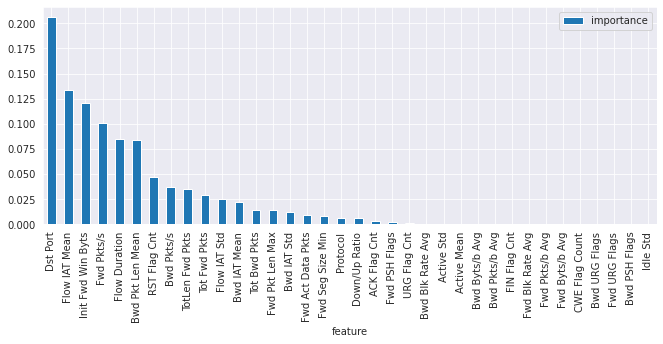

In [ ]:
#Feature Selection
rfc = RandomForestClassifier();

# fit random forest classifier on the training set
rfc.fit(x, y);

# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':x.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();


In [ ]:
#Recursive feature elimination
from sklearn.feature_selection import RFE
import itertools

rfc = RandomForestClassifier()

# create the RFE model and select 20 attributes
rfe = RFE(rfc, n_features_to_select=20)
rfe = rfe.fit(x, y.values.ravel())

# summarize the selection of the attributes
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), x.columns)]
selected_features = [v for i, v in feature_map if i==True]


In [ ]:
selected_features

['Dst Port',
 'Flow Duration',
 'Tot Fwd Pkts',
 'Tot Bwd Pkts',
 'TotLen Fwd Pkts',
 'Fwd Pkt Len Max',
 'Bwd Pkt Len Mean',
 'Flow IAT Mean',
 'Flow IAT Std',
 'Bwd IAT Mean',
 'Bwd IAT Std',
 'Fwd PSH Flags',
 'Fwd Pkts/s',
 'Bwd Pkts/s',
 'RST Flag Cnt',
 'ACK Flag Cnt',
 'Down/Up Ratio',
 'Init Fwd Win Byts',
 'Fwd Act Data Pkts',
 'Fwd Seg Size Min']

In [ ]:
a = [i[0] for i in feature_map]

new_x = x.iloc[:,a]
new_x

,Dst Port,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,Fwd Pkt Len Max,Bwd Pkt Len Mean,Flow IAT Mean,Flow IAT Std,Bwd IAT Mean,Bwd IAT Std,Fwd PSH Flags,Fwd Pkts/s,Bwd Pkts/s,RST Flag Cnt,ACK Flag Cnt,Down/Up Ratio,Init Fwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min
0,443,141385,9,7,553,202,539.000000,9425.666667,19069.116850,8569.50000,13036.89082,0,63.655975,49.510203,1,0,0,8192,4,20
1,49684,281,2,1,38,38,0.000000,140.500000,174.655375,0.00000,0.00000,1,7117.437722,3558.718861,0,1,0,123,0,20
2,443,279824,11,15,1086,385,701.800000,11192.960000,24379.448340,18494.57143,36356.50372,0,39.310424,53.605123,1,0,1,8192,5,20
3,443,132,2,0,0,0,0.000000,132.000000,0.000000,0.00000,0.00000,0,15151.515150,0.000000,0,1,0,256,0,20
4,443,274016,9,13,1285,517,472.384615,13048.380950,26311.627030,21082.83333,39075.73819,0,32.844797,47.442485,1,0,1,8192,5,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,3389,3982183,14,8,1442,725,216.375000,189627.761900,257112.296400,561554.14290,350274.78920,0,3.515660,2.008948,1,0,0,8192,7,20
1048571,3389,3802316,14,8,1440,725,216.375000,181062.666700,238818.306400,533406.28570,311396.98980,0,3.681966,2.103981,1,0,0,8192,7,20
1048572,3389,4004239,14,8,1459,741,216.375000,190678.047600,281077.954400,558238.28570,406374.82050,0,3.496295,1.997883,1,0,0,8192,7,20
1048573,3389,3998435,14,8,1459,741,216.375000,190401.666700,266617.176600,564546.42860,353335.53610,0,3.501370,2.000783,1,0,0,8192,7,20


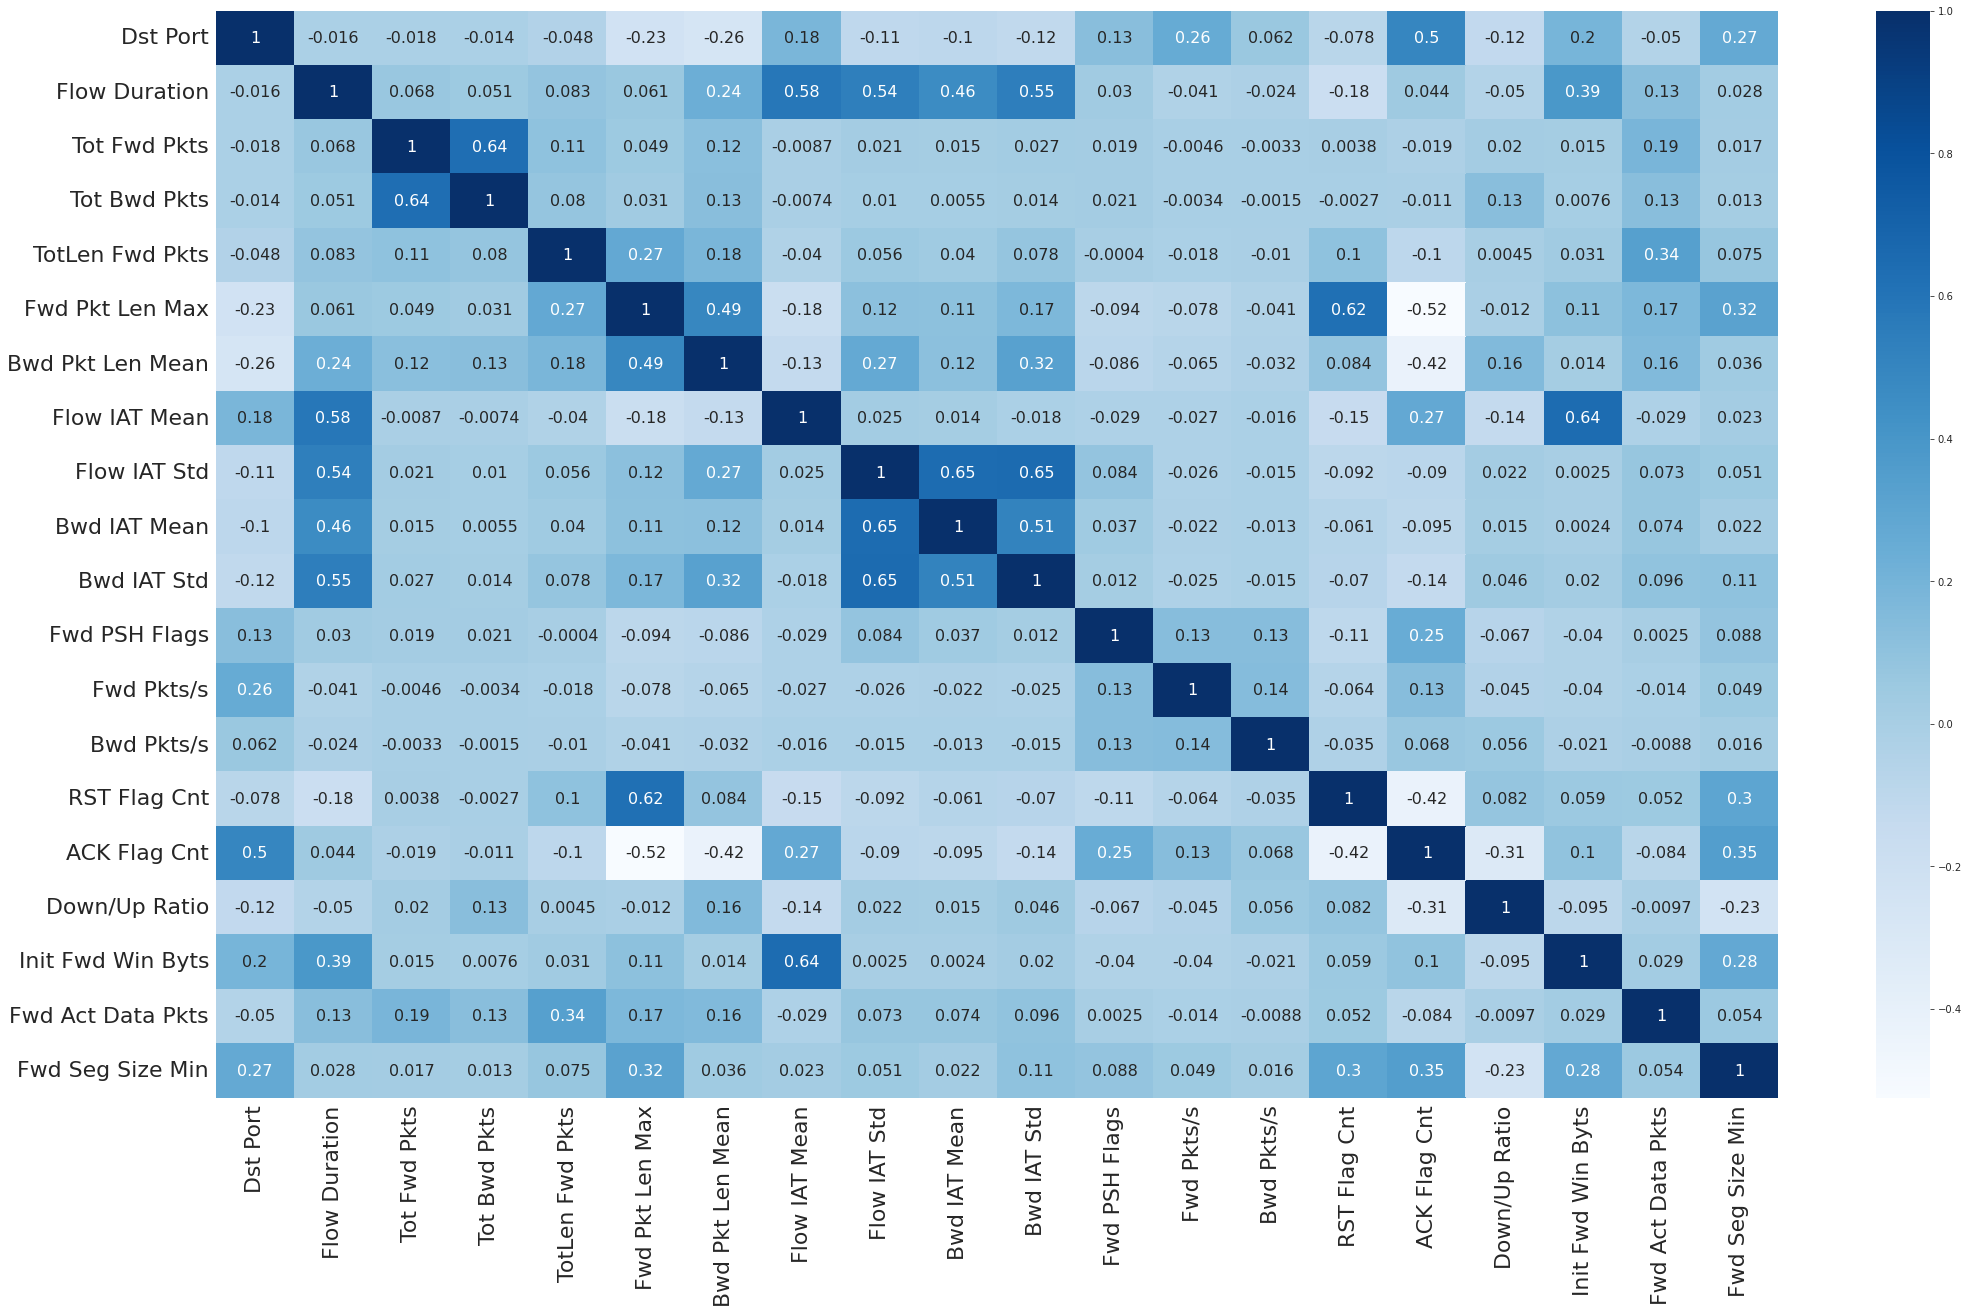

In [106]:
import seaborn as sns

corr = new_x.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values , cmap="Blues", annot = True, annot_kws={"size":16})
heat_map= plt.gcf()
heat_map.set_size_inches(35,20)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.show()

In [ ]:
new_df = pd.concat([new_x, y], axis=1)
new_df

,Dst Port,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,Fwd Pkt Len Max,Bwd Pkt Len Mean,Flow IAT Mean,Flow IAT Std,Bwd IAT Mean,Bwd IAT Std,Fwd PSH Flags,Fwd Pkts/s,Bwd Pkts/s,RST Flag Cnt,ACK Flag Cnt,Down/Up Ratio,Init Fwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Label
0,443,141385,9,7,553,202,539.000000,9425.666667,19069.116850,8569.50000,13036.89082,0,63.655975,49.510203,1,0,0,8192,4,20,Benign
1,49684,281,2,1,38,38,0.000000,140.500000,174.655375,0.00000,0.00000,1,7117.437722,3558.718861,0,1,0,123,0,20,Benign
2,443,279824,11,15,1086,385,701.800000,11192.960000,24379.448340,18494.57143,36356.50372,0,39.310424,53.605123,1,0,1,8192,5,20,Benign
3,443,132,2,0,0,0,0.000000,132.000000,0.000000,0.00000,0.00000,0,15151.515150,0.000000,0,1,0,256,0,20,Benign
4,443,274016,9,13,1285,517,472.384615,13048.380950,26311.627030,21082.83333,39075.73819,0,32.844797,47.442485,1,0,1,8192,5,20,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,3389,3982183,14,8,1442,725,216.375000,189627.761900,257112.296400,561554.14290,350274.78920,0,3.515660,2.008948,1,0,0,8192,7,20,Benign
1048571,3389,3802316,14,8,1440,725,216.375000,181062.666700,238818.306400,533406.28570,311396.98980,0,3.681966,2.103981,1,0,0,8192,7,20,Benign
1048572,3389,4004239,14,8,1459,741,216.375000,190678.047600,281077.954400,558238.28570,406374.82050,0,3.496295,1.997883,1,0,0,8192,7,20,Benign
1048573,3389,3998435,14,8,1459,741,216.375000,190401.666700,266617.176600,564546.42860,353335.53610,0,3.501370,2.000783,1,0,0,8192,7,20,Benign


In [ ]:
new_df.describe()

,Dst Port,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,Fwd Pkt Len Max,Bwd Pkt Len Mean,Flow IAT Mean,Flow IAT Std,Bwd IAT Mean,Bwd IAT Std,Fwd PSH Flags,Fwd Pkts/s,Bwd Pkts/s,RST Flag Cnt,ACK Flag Cnt,Down/Up Ratio,Init Fwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min
count,1.043116e+06,1.043116e+06,1.043116e+06,1.043116e+06,1.043116e+06,1.043116e+06,1.043116e+06,1.043116e+06,1.043116e+06,1.043116e+06,1.043116e+06,1.043116e+06,1.043116e+06,1.043116e+06,1.043116e+06,1.043116e+06,1.043116e+06,1.043116e+06,1.043116e+06,1.043116e+06
mean,8.437320e+03,1.157446e+07,5.907731e+00,7.019610e+00,3.941328e+02,2.115296e+02,1.033310e+02,4.282122e+06,7.114346e+05,5.379663e+05,6.384717e+05,3.057762e-02,1.739338e+04,2.414129e+03,2.657940e-01,3.310744e-01,4.819847e-01,6.954089e+03,2.054928e+00,1.744126e+01
std,1.519790e+04,3.018830e+07,8.926538e+01,2.135139e+02,2.165237e+03,2.672137e+02,1.662808e+02,1.681636e+07,2.980652e+06,2.609924e+06,2.729057e+06,1.721704e-01,1.625239e+05,3.821242e+04,4.417553e-01,4.706000e-01,8.308950e-01,1.276077e+04,1.396023e+01,5.189411e+00
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00
25%,8.000000e+01,5.190000e+02,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.960000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.632302e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.510000e+02,0.000000e+00,2.000000e+01
50%,3.389000e+03,1.128500e+04,3.000000e+00,1.000000e+00,6.400000e+01,4.600000e+01,3.225000e+01,1.923167e+03,1.661701e+03,0.000000e+00,0.000000e+00,0.000000e+00,2.641310e+02,3.511263e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.192000e+03,1.000000e+00,2.000000e+01
75%,8.080000e+03,2.224901e+06,7.000000e+00,5.000000e+00,3.730000e+02,3.260000e+02,1.630000e+02,1.597882e+05,2.406998e+05,2.144278e+05,5.919543e+04,0.000000e+00,3.448276e+03,3.659652e+02,1.000000e+00,1.000000e+00,1.000000e+00,8.192000e+03,3.000000e+00,2.000000e+01
max,6.553400e+04,1.200000e+08,4.315900e+04,6.924100e+04,1.100627e+06,1.711000e+03,1.459620e+03,1.200000e+08,8.450000e+07,1.200000e+08,8.480000e+07,1.000000e+00,3.000000e+06,2.000000e+06,1.000000e+00,1.000000e+00,1.480000e+02,6.553500e+04,9.262000e+03,4.400000e+01


# **Data visualization**

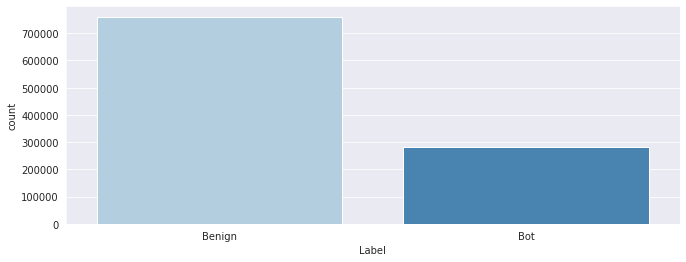

In [ ]:
sns.set_style('darkgrid')
sns.countplot( x = 'Label' , data = df , palette = 'Blues')

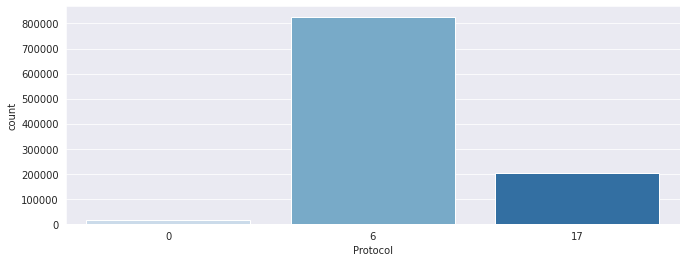

In [ ]:
sns.set_style('darkgrid')
sns.countplot( x = 'Protocol' , data = df , palette = 'Blues')

# **Data preprocessing**

In [ ]:
minority_class_len = len(new_df[new_df['Label'] == 'Bot'])
print(minority_class_len)

282310


In [ ]:
majority_class_indices = new_df[new_df['Label'] == 'Benign'].index
print(majority_class_indices)

Int64Index([      0,       1,       2,       3,       4,       5,       6,
                  7,       8,       9,
            ...
            1048565, 1048566, 1048567, 1048568, 1048569, 1048570, 1048571,
            1048572, 1048573, 1048574],
           dtype='int64', length=760806)


In [ ]:
random_majority_indices = np.random.choice(majority_class_indices, minority_class_len, replace=False)
print(len(random_majority_indices))

282310


In [ ]:
minority_class_indices = new_df[new_df['Label'] == 'Bot'].index
print(minority_class_indices)

Int64Index([  1234,   1235,   1236,   1237,   1240,   1241,   1242,   1243,
              1244,   1245,
            ...
            354908, 355536, 355785, 355971, 356017, 356594, 356709, 356768,
            357370, 357420],
           dtype='int64', length=282310)


In [ ]:
undersample_indices = np.concatenate([minority_class_indices, random_majority_indices])

In [ ]:
undersample = new_df.loc[undersample_indices]

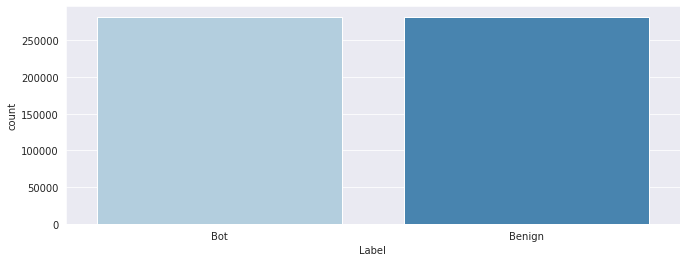

In [ ]:
sns.countplot( x = 'Label' , data = undersample , palette = 'Blues')

# **Split Data**

In [ ]:
x = undersample.drop(columns='Label')
y = undersample.Label

from sklearn.model_selection import train_test_split
#Xtrain X test 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

# **Modeling**

In [ ]:
# Apply First Model: Logistic Regression Model 

from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression() 
lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
# First Model: Logistic Regression Model Evaluation 

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Benign       1.00      0.94      0.97     84647
         Bot       0.94      1.00      0.97     84739

    accuracy                           0.97    169386
   macro avg       0.97      0.97      0.97    169386
weighted avg       0.97      0.97      0.97    169386



In [ ]:
# Apply Second Model: Random Forest
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

In [ ]:
# Second Model: Random Forest Model Evaluation 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00     84647
         Bot       1.00      1.00      1.00     84739

    accuracy                           1.00    169386
   macro avg       1.00      1.00      1.00    169386
weighted avg       1.00      1.00      1.00    169386



In [ ]:
# Apply thired Model: KNN

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

In [ ]:
# Thired Model: KNN Model Evaluation 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00     84647
         Bot       1.00      1.00      1.00     84739

    accuracy                           1.00    169386
   macro avg       1.00      1.00      1.00    169386
weighted avg       1.00      1.00      1.00    169386

